<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/GDSTK_Square_Spiral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Running this script will generate a square spiral, with a plot preview using matplotlib. Once the design is downloaded at the end, please be sure to add the ".gds" file extension when saving the file to your local machine.

In [1]:
!pip install gdstk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 534.7/534.7 kB 16.7 MB/s eta 0:00:00


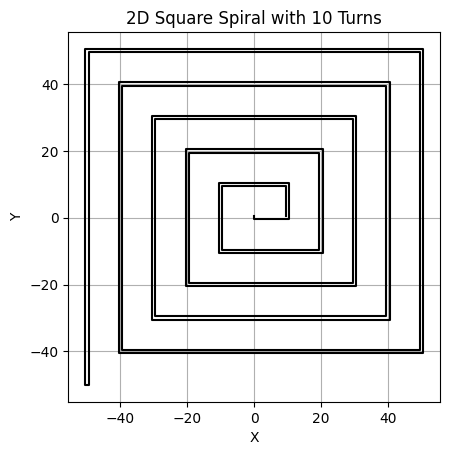

In [3]:
import gdstk
import matplotlib.pyplot as plt
import numpy as np

# Parameters
turns = 10
step = 10  # Length of each segment
start_x, start_y = 0, 0  # Starting point

# Initialize path
path = gdstk.FlexPath([(start_x, start_y)], width=1)

# Directions: right, up, left, down
directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]

# Build the spiral
current_pos = np.array([start_x, start_y], dtype=float)
length = step
for i in range(1, 2 * turns + 1):
    direction = directions[(i - 1) % 4]
    delta = np.array(direction) * length
    current_pos += delta
    path.segment(current_pos)
    if i % 2 == 0:
        length += step

# Create a cell and add the path
cell = gdstk.Cell("SPIRAL")
cell.add(path)

# Create a library and add the cell
lib = gdstk.Library()
lib.add(cell)

# Save to a GDSII file
lib.write_gds("square_spiral.gds")

# Plot using matplotlib
fig, ax = plt.subplots()
for polygon in path.to_polygons():
    points = polygon.points  # Access the array of points
    x, y = zip(*points)      # Unpack the points into x and y coordinates
    ax.plot(x, y, 'k-')      # Plot the polygon
ax.set_aspect('equal')
plt.title("2D Square Spiral with 10 Turns")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

In [4]:
from google.colab import files
files.download("square_spiral.gds")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>